# Data cleaning
W tym pliku przygotuję zbiór danych do dalszej pracy.

## Import potrzebnych bibliotek.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Wczytanie danych z plików CSV.

In [74]:
# główne dane
postings = pd.read_csv('postings.csv')

In [41]:
# dodatkowe informacje
job_industries = pd.read_csv('job_industries.csv')
industries = pd.read_csv('industries.csv')
job_skills = pd.read_csv('job_skills.csv')
skills = pd.read_csv('skills.csv')
employee_counts = pd.read_csv('employee_counts.csv')

## Sprawdzenie podstawowych informacji o danych:
### * postings.csv (struktura, ile jest braków w każdej kolumnie)

In [42]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [43]:
postings.head(5)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [44]:
missing_percent = (postings.isna().sum() / len(postings)) * 100
missing_percent.sort_values(ascending=False)

closed_time                   99.133622
skills_desc                   98.030666
med_salary                    94.929309
remote_allowed                87.689848
applies                       81.170619
max_salary                    75.944093
min_salary                    75.944093
currency                      70.873402
compensation_type             70.873402
normalized_salary             70.873402
pay_period                    70.873402
posting_domain                32.271556
application_url               29.604599
formatted_experience_level    23.745852
fips                          22.135827
zip_code                      16.852780
company_name                   1.387981
company_id                     1.386366
views                          1.363757
description                    0.005652
work_type                      0.000000
sponsored                      0.000000
job_id                         0.000000
listed_time                    0.000000
expiry                         0.000000


In [45]:
missing_percent[missing_percent > 0]

company_name                   1.387981
description                    0.005652
max_salary                    75.944093
pay_period                    70.873402
company_id                     1.386366
views                          1.363757
med_salary                    94.929309
min_salary                    75.944093
applies                       81.170619
remote_allowed                87.689848
application_url               29.604599
closed_time                   99.133622
formatted_experience_level    23.745852
skills_desc                   98.030666
posting_domain                32.271556
currency                      70.873402
compensation_type             70.873402
normalized_salary             70.873402
zip_code                      16.852780
fips                          22.135827
dtype: float64

In [46]:
postings.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.238490e+05,2.979300e+04,1.221320e+05,122160.000000,6280.000000,2.979300e+04,23320.000000,1.238490e+05,15246.0,1.238490e+05,1.073000e+03,1.238490e+05,123849.0,3.607300e+04,102977.000000,96434.000000
mean,3.896402e+09,9.193942e+04,1.220401e+07,14.618247,22015.619876,6.491085e+04,10.591981,1.713152e+12,1.0,1.716213e+12,1.712928e+12,1.713204e+12,0.0,2.053270e+05,50400.491887,28713.879887
std,8.404355e+07,7.011101e+05,2.554143e+07,85.903598,52255.873846,4.959738e+05,29.047395,4.848209e+08,0.0,2.321394e+09,3.622893e+08,3.989122e+08,0.0,5.097627e+06,30252.232515,16015.929825
min,9.217160e+05,1.000000e+00,1.009000e+03,1.000000,0.000000,1.000000e+00,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.711317e+12,0.0,0.000000e+00,1001.000000,1003.000000
25%,3.894587e+09,4.828000e+01,1.435200e+04,3.000000,18.940000,3.700000e+01,1.000000,1.712863e+12,1.0,1.715481e+12,1.712670e+12,1.712886e+12,0.0,5.200000e+04,24112.000000,13121.000000
50%,3.901998e+09,8.000000e+04,2.269650e+05,4.000000,25.500000,6.000000e+04,3.000000,1.713395e+12,1.0,1.716042e+12,1.712670e+12,1.713408e+12,0.0,8.150000e+04,48059.000000,29183.000000
75%,3.904707e+09,1.400000e+05,8.047188e+06,8.000000,2510.500000,1.000000e+05,8.000000,1.713478e+12,1.0,1.716088e+12,1.713283e+12,1.713484e+12,0.0,1.250000e+05,78201.000000,42077.000000
max,3.906267e+09,1.200000e+08,1.034730e+08,9975.000000,750000.000000,8.500000e+07,967.000000,1.713573e+12,1.0,1.729125e+12,1.713562e+12,1.713573e+12,0.0,5.356000e+08,99901.000000,56045.000000


In [47]:
postings.describe(include='object')

,company_name,title,description,pay_period,location,formatted_work_type,job_posting_url,application_url,application_type,formatted_experience_level,skills_desc,posting_domain,work_type,currency,compensation_type
count,122130,123849,123842,36073,123849,123849,123849,87184,123849,94440,2439,83881,123849,36073,36073
unique,24428,72521,107827,5,8526,7,123849,84800,4,6,2212,4443,7,6,1
top,Liberty Healthcare and Rehabilitation Services,Sales Manager,Position Summary: Our Sales Manager has managi...,YEARLY,United States,Full-time,https://www.linkedin.com/jobs/view/921716/?trk...,https://app.dataannotation.tech/worker_signup?...,OffsiteApply,Mid-Senior level,This position requires the following skills: E...,www.click2apply.net,FULL_TIME,USD,BASE_SALARY
freq,1108,673,474,20628,8125,98814,1,205,84607,41489,28,3811,98814,36058,36073


# Target - normal_salary

Najwieksze wartosci normalized_salary:

In [48]:
postings[['normalized_salary']].sort_values(by='normalized_salary', ascending=False).head(10)

,normalized_salary
9237,535600000.0
98888,362408800.0
13614,286000000.0
89082,286000000.0
60038,260000000.0
102481,230423440.0
71845,228800000.0
72585,187200000.0
17646,156000000.0
87241,135200000.0


USUWANIE outlierow METODĄ IGR:

In [77]:
# Oblicz wartości kwartylowe
q1 = postings['normalized_salary'].quantile(0.25)
q3 = postings['normalized_salary'].quantile(0.75)
iqr = q3 - q1

# Górna granica outlierów
upper_bound = q3 + 1.5 * iqr

# Tworzymy wersję danych bez outlierów (IQR)
postings_iqr = postings[postings['normalized_salary'] <= upper_bound].copy()

print(f"Liczba ogłoszeń po filtrze IQR: {len(postings_iqr)} z {len(postings)}")
print(f"Granica IQR: {upper_bound}")

Liczba ogłoszeń po filtrze IQR: 35121 z 123849
Granica IQR: 234500.0


Usuwanie arbitralnie (cięcie)

In [50]:
salary_cutoff = 1_000_000
postings_cutoff = postings[postings['normalized_salary'] <= salary_cutoff].copy()

print(f"Liczba ogłoszeń po arbitralnym cieciu: {len(postings_cutoff)} z {len(postings)}")


Liczba ogłoszeń po arbitralnym cieciu: 36035 z 123849


Porównanie histogramow:

C:\Users\wiatr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wiatr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


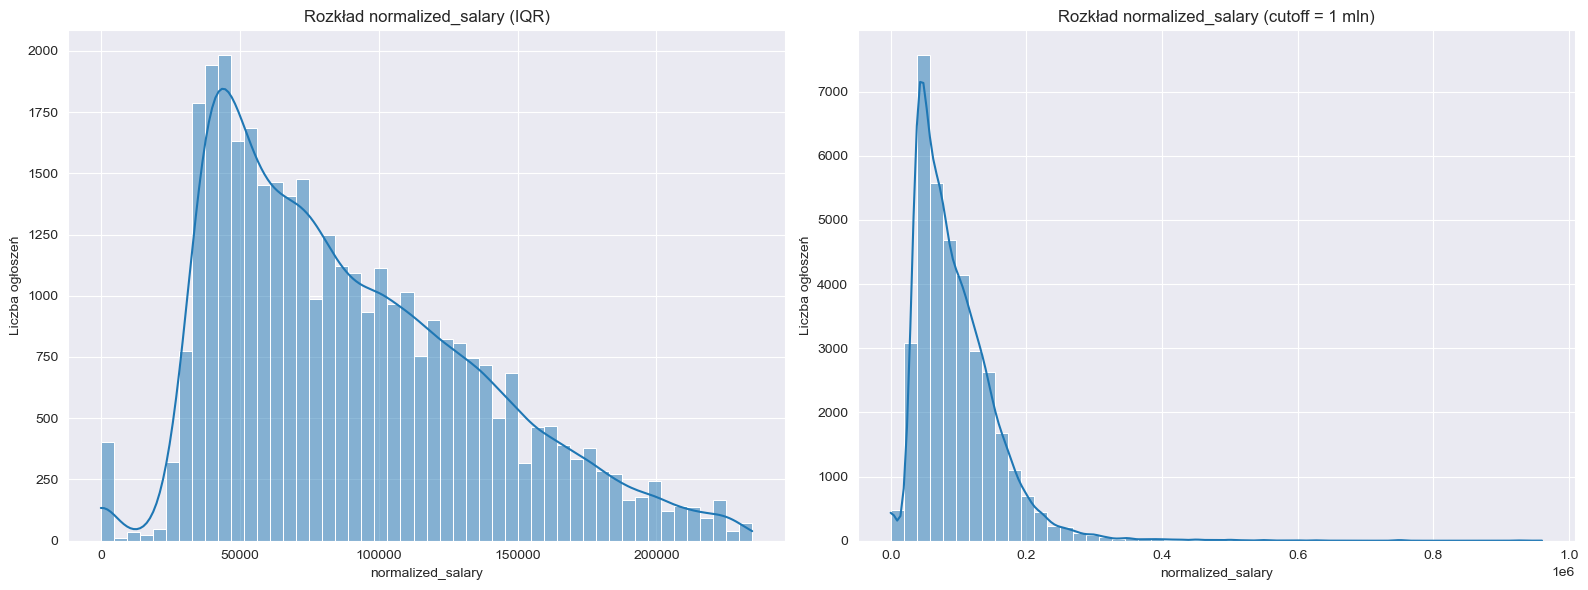

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# IQR
sns.histplot(postings_iqr['normalized_salary'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('Rozkład normalized_salary (IQR)')
axs[0].set_xlabel('normalized_salary')
axs[0].set_ylabel('Liczba ogłoszeń')

# Arbitralny cutoff
sns.histplot(postings_cutoff['normalized_salary'], bins=50, kde=True, ax=axs[1])
axs[1].set_title('Rozkład normalized_salary (cutoff = 1 mln)')
axs[1].set_xlabel('normalized_salary')
axs[1].set_ylabel('Liczba ogłoszeń')

plt.tight_layout()
plt.show()


Porównanie podstawowych statystyk:

In [52]:
print("STATYSTYKI IQR")
print(postings_iqr['normalized_salary'].describe())

print("\nSTATYSTYKI CUTOFF")
print(postings_cutoff['normalized_salary'].describe())

STATYSTYKI IQR
count     35121.000000
mean      89683.318165
std       47324.396358
min           0.000000
25%       50960.000000
50%       80000.000000
75%      120000.000000
max      234500.000000
Name: normalized_salary, dtype: float64

STATYSTYKI CUTOFF
count     36035.000000
mean      95477.892806
std       61476.056372
min           0.000000
25%       51978.550000
50%       81255.200000
75%      124800.000000
max      960000.000000
Name: normalized_salary, dtype: float64


### Czyszczenie pozostałych danych:
Usunięcie kolumn niepotrzebnych i z bardzo dużą ilością braków: 

In [78]:
cols_to_drop = [
    'closed_time', 'skills_desc', 'med_salary', 'max_salary', 'min_salary',
     'applies', 'views', 'application_url', 'posting_domain',
    'fips', 'zip_code', 'job_posting_url', 'description', 'original_listed_time', 'listed_time', 'expiry', 'sponsored', 'formatted_work_type'
]

In [79]:
postings_model_input = postings_iqr.copy()

In [80]:
postings_cleaned = postings_model_input.drop(columns=cols_to_drop)

Usunięcie wierszy z brakami w kluczowych kolumnach:

In [81]:
salary_essential = ['normalized_salary', 'currency', 'pay_period', 'compensation_type']
postings_cleaned = postings_cleaned.dropna(subset=salary_essential)

Imputacja dla małych braków - experience level:

In [82]:
if postings_cleaned['formatted_experience_level'].isna().sum() > 0:
    exp_mode = postings_cleaned['formatted_experience_level'].mode()[0]
    postings_cleaned['formatted_experience_level'] = postings_cleaned['formatted_experience_level'].fillna(exp_mode)

Usunięcie pojedynczych wierszy z minimalnymi brakami (company_name, company_id...)

In [83]:
essential_low_nulls = ['company_name', 'company_id', 'work_type', 'application_type']
postings_cleaned = postings_cleaned.dropna(subset=essential_low_nulls)

Sprawdzenie ile jest niepustych wartosci remote_allowed:

In [84]:
print(postings_cleaned['remote_allowed'].value_counts())

remote_allowed
1.0    4566
Name: count, dtype: int64


Sprawdzenie rozmiaru danych przed i po czyszczeniu:

In [59]:
print("Rozmiar danych PO CZYSZCZENIU:")
print(f"Liczba ofert: {len(postings_cleaned)}")
print(f"Liczba kolumn: {postings_cleaned.shape[1]}")
print(f"Liczba braków (po czyszczeniu): \n{postings_cleaned.isna().sum().sort_values(ascending=False).head(10)}")

Rozmiar danych PO CZYSZCZENIU:
Liczba ofert: 34625
Liczba kolumn: 12
Liczba braków (po czyszczeniu): 
job_id                        0
company_name                  0
title                         0
pay_period                    0
location                      0
company_id                    0
application_type              0
formatted_experience_level    0
work_type                     0
currency                      0
dtype: int64


Tymczasowe pokazanie kilku pierwszych wierszy wyczyszczonego wstępnie zbioru:

In [61]:
postings_cleaned.head(10)

,job_id,company_name,title,pay_period,location,company_id,application_type,formatted_experience_level,work_type,currency,compensation_type,normalized_salary
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,HOURLY,"Princeton, NJ",2774458.0,ComplexOnsiteApply,Mid-Senior level,FULL_TIME,USD,BASE_SALARY,38480.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,YEARLY,"Cincinnati, OH",64896719.0,ComplexOnsiteApply,Mid-Senior level,FULL_TIME,USD,BASE_SALARY,55000.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,YEARLY,"New Hyde Park, NY",766262.0,ComplexOnsiteApply,Mid-Senior level,FULL_TIME,USD,BASE_SALARY,157500.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,HOURLY,"Raleigh, NC",1481176.0,ComplexOnsiteApply,Mid-Senior level,INTERNSHIP,USD,BASE_SALARY,35360.0
6,103254301,Raw Cereal,Producer,YEARLY,United States,81942316.0,SimpleOnsiteApply,Mid-Senior level,CONTRACT,USD,BASE_SALARY,180000.0
9,2264355,Bay West Church,Worship Leader,MONTHLY,"Palm Bay, FL",28631247.0,ComplexOnsiteApply,Mid-Senior level,PART_TIME,USD,BASE_SALARY,4200.0
16,95428182,CLEVELAND KIDS BOOK BANK,Administrative Coordinator,HOURLY,"Cleveland, OH",55624331.0,OffsiteApply,Mid-Senior level,FULL_TIME,USD,BASE_SALARY,52000.0
30,229924287,REquipment Durable Medical Equipment and Assis...,Administrative Assistant,HOURLY,"Woburn, MA",14773918.0,ComplexOnsiteApply,Mid-Senior level,PART_TIME,USD,BASE_SALARY,47840.0
35,266566927,Revesco Properties,Marketing & Office Coordinator,YEARLY,"Denver, CO",8577252.0,SimpleOnsiteApply,Mid-Senior level,FULL_TIME,USD,BASE_SALARY,65000.0
36,266825034,Recruitment Design,Software Support Specialist,YEARLY,"McLean, VA",99212509.0,ComplexOnsiteApply,Mid-Senior level,FULL_TIME,USD,BASE_SALARY,62500.0


Wiersze z pełną informacją płacową:

In [63]:
postings[['normalized_salary', 'currency', 'compensation_type', 'pay_period']].isna().sum()
complete_salary_rows = postings_cleaned.dropna(subset=['normalized_salary', 'currency', 'compensation_type', 'pay_period'])
print(f"Liczba ofert z pełnymi danymi płacowymi: {len(complete_salary_rows)} z {len(postings)}")

Liczba ofert z pełnymi danymi płacowymi: 34625 z 123849


Sprawdzenie występowania wartości w currency

In [64]:
print(postings_cleaned['currency'].value_counts())

currency
USD    34612
EUR        6
CAD        3
BBD        2
GBP        2
Name: count, dtype: int64


Kolumna currency została przeanalizowana pod kątem unikalnych wartości. Spośród wszystkich 35 563 rekordów, aż 99.96% miało wartość USD. Pozostałe 13 rekordów używały walut takich jak EUR, CAD, GBP, BBD. Zdecydowano się usunąć rekordy niebędące w USD i następnie usunąć samą kolumnę jako zbędną – dane są jednolite walutowo.

In [65]:
print(postings_cleaned['compensation_type'].value_counts())

compensation_type
BASE_SALARY    34625
Name: count, dtype: int64


Kolumna compensation_type okazała się jednorodna – wszystkie rekordy zawierały wartość BASE_SALARY. W związku z brakiem zmienności cecha została usunięta jako nieinformacyjna.

In [66]:
print(postings_cleaned['work_type'].value_counts())

work_type
FULL_TIME     27888
CONTRACT       3759
PART_TIME      2217
TEMPORARY       387
INTERNSHIP      236
OTHER           130
VOLUNTEER         8
Name: count, dtype: int64


In [67]:
print(postings_cleaned['formatted_experience_level'].value_counts())

formatted_experience_level
Mid-Senior level    20006
Entry level          9059
Associate            3818
Director             1108
Internship            368
Executive             266
Name: count, dtype: int64


In [85]:
print(postings_cleaned['remote_allowed'].value_counts())

remote_allowed
1.0    4566
Name: count, dtype: int64


In [86]:
print(postings_cleaned['pay_period'].value_counts())

pay_period
YEARLY      19481
HOURLY      14463
MONTHLY       501
WEEKLY        177
BIWEEKLY        3
Name: count, dtype: int64


Sprawdzenie location:

In [68]:
# Policzmy długość location – 2 przecinki = city, state, country (czyli 3 pola); 1 przecinek = city, state; brak przecinka = tylko kraj

postings_cleaned['location_comma_count'] = postings_cleaned['location'].str.count(',')

# Rekordy tylko z krajem (np. "United States")
only_country = postings_cleaned[postings_cleaned['location_comma_count'] == 0]
print(f"Liczba rekordów z samym krajem: {len(only_country)}")

# Rekordy z City, ST (1 przecinek)
city_state = postings_cleaned[postings_cleaned['location_comma_count'] == 1]
print(f"Liczba rekordów z miastem i stanem: {len(city_state)}")

# Rekordy z City, ST, Country (2 przecinki)
full_location = postings_cleaned[postings_cleaned['location_comma_count'] == 2]
print(f"Liczba rekordów z pełną lokalizacją: {len(full_location)}")

Liczba rekordów z samym krajem: 4185
Liczba rekordów z miastem i stanem: 30234
Liczba rekordów z pełną lokalizacją: 206


In [69]:
# Rekordy, gdzie location to tylko kraj (brak przecinka)
only_country = postings_cleaned[postings_cleaned['location'].str.count(',') == 0]

# Wyświetlenie unikalnych wartości
print("Unikalne wartości 'location' dla rekordów zawierających tylko kraj:")
print(only_country['location'].value_counts())

Unikalne wartości 'location' dla rekordów zawierających tylko kraj:
location
United States                             2456
New York City Metropolitan Area            421
Los Angeles Metropolitan Area              142
San Francisco Bay Area                     129
Dallas-Fort Worth Metroplex                 90
                                          ... 
Maui                                         1
Erie-Meadville Area                          1
Lawton Area                                  1
Pensacola Metropolitan Area                  1
Blacksburg-Christiansburg-Radford Area       1
Name: count, Length: 111, dtype: int64


Usunięcie jednorodnych kolumn currency oraz compensation_type:

In [70]:
postings_cleaned = postings_cleaned[postings_cleaned['currency'] == 'USD']
postings_cleaned = postings_cleaned.drop(columns=['currency'])

In [71]:
postings_cleaned = postings_cleaned[postings_cleaned['compensation_type'] == 'BASE_SALARY']
postings_cleaned = postings_cleaned.drop(columns=['compensation_type'])

Kodowanie cech kategorycznych przez OneHotEncoding

In [72]:
postings_encoded = pd.get_dummies(
    postings_cleaned,
    columns=['work_type', 'formatted_experience_level'],
    drop_first=True  # unika redundancji (np. jeśli FULL_TIME i PART_TIME, to tylko PART_TIME == 1 znaczy, że nie jest full)
)

Podgląd:

In [73]:
print("Finalny kształt danych:", postings_encoded.shape)
print("Kolumny po kodowaniu:", postings_encoded.columns.tolist())

Finalny kształt danych: (34612, 20)
Kolumny po kodowaniu: ['job_id', 'company_name', 'title', 'pay_period', 'location', 'company_id', 'application_type', 'normalized_salary', 'location_comma_count', 'work_type_FULL_TIME', 'work_type_INTERNSHIP', 'work_type_OTHER', 'work_type_PART_TIME', 'work_type_TEMPORARY', 'work_type_VOLUNTEER', 'formatted_experience_level_Director', 'formatted_experience_level_Entry level', 'formatted_experience_level_Executive', 'formatted_experience_level_Internship', 'formatted_experience_level_Mid-Senior level']


In [36]:
postings_cleaned.head(5)

,job_id,company_name,title,pay_period,location,company_id,application_type,formatted_experience_level,work_type,normalized_salary,location_comma_count
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,HOURLY,"Princeton, NJ",2774458.0,ComplexOnsiteApply,Mid-Senior level,FULL_TIME,38480.0,1
2,10998357,The National Exemplar,Assitant Restaurant Manager,YEARLY,"Cincinnati, OH",64896719.0,ComplexOnsiteApply,Mid-Senior level,FULL_TIME,55000.0,1
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,YEARLY,"New Hyde Park, NY",766262.0,ComplexOnsiteApply,Mid-Senior level,FULL_TIME,157500.0,1
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,HOURLY,"Raleigh, NC",1481176.0,ComplexOnsiteApply,Mid-Senior level,INTERNSHIP,35360.0,1
6,103254301,Raw Cereal,Producer,YEARLY,United States,81942316.0,SimpleOnsiteApply,Mid-Senior level,CONTRACT,180000.0,0


In [87]:
postings_encoded.head(10)

,job_id,company_name,title,pay_period,location,company_id,application_type,normalized_salary,location_comma_count,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,formatted_experience_level_Director,formatted_experience_level_Entry level,formatted_experience_level_Executive,formatted_experience_level_Internship,formatted_experience_level_Mid-Senior level
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,HOURLY,"Princeton, NJ",2774458.0,ComplexOnsiteApply,38480.0,1,True,False,False,False,False,False,False,False,False,False,True
2,10998357,The National Exemplar,Assitant Restaurant Manager,YEARLY,"Cincinnati, OH",64896719.0,ComplexOnsiteApply,55000.0,1,True,False,False,False,False,False,False,False,False,False,True
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,YEARLY,"New Hyde Park, NY",766262.0,ComplexOnsiteApply,157500.0,1,True,False,False,False,False,False,False,False,False,False,True
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,HOURLY,"Raleigh, NC",1481176.0,ComplexOnsiteApply,35360.0,1,False,True,False,False,False,False,False,False,False,False,True
6,103254301,Raw Cereal,Producer,YEARLY,United States,81942316.0,SimpleOnsiteApply,180000.0,0,False,False,False,False,False,False,False,False,False,False,True
9,2264355,Bay West Church,Worship Leader,MONTHLY,"Palm Bay, FL",28631247.0,ComplexOnsiteApply,4200.0,1,False,False,False,True,False,False,False,False,False,False,True
16,95428182,CLEVELAND KIDS BOOK BANK,Administrative Coordinator,HOURLY,"Cleveland, OH",55624331.0,OffsiteApply,52000.0,1,True,False,False,False,False,False,False,False,False,False,True
30,229924287,REquipment Durable Medical Equipment and Assis...,Administrative Assistant,HOURLY,"Woburn, MA",14773918.0,ComplexOnsiteApply,47840.0,1,False,False,False,True,False,False,False,False,False,False,True
35,266566927,Revesco Properties,Marketing & Office Coordinator,YEARLY,"Denver, CO",8577252.0,SimpleOnsiteApply,65000.0,1,True,False,False,False,False,False,False,False,False,False,True
36,266825034,Recruitment Design,Software Support Specialist,YEARLY,"McLean, VA",99212509.0,ComplexOnsiteApply,62500.0,1,True,False,False,False,False,False,False,False,False,False,True
